In [2]:
import numpy as np
import pandas as pd
import time

In [165]:
intraday_price = [36.5,51.1,79.7,38.1,62.34,99]

In [134]:
data.head()

,dtm,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
0,2024-04-01 00:00:00,50.099,0.423174,-0.0,0.049412,0.0,0.022703,0.0
1,2024-04-01 00:00:01,50.089,0.372796,-0.0,0.043529,0.0,0.020000,0.0
2,2024-04-01 00:00:02,50.074,0.297229,-0.0,0.034706,0.0,0.015946,0.0
3,2024-04-01 00:00:03,50.062,0.236776,-0.0,0.027647,0.0,0.012703,0.0
4,2024-04-01 00:00:04,50.054,0.196474,-0.0,0.022941,0.0,0.010541,0.0


In [121]:
filtered_df.head()

,dtm,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
172800,2024-04-03 00:00:00,50.133,0.594458,-0.0,0.363500,0.0,0.031892,0.0
172801,2024-04-03 00:00:01,50.121,0.534005,-0.0,0.249500,0.0,0.028649,0.0
172802,2024-04-03 00:00:02,50.110,0.478589,-0.0,0.145000,0.0,0.025676,0.0
172803,2024-04-03 00:00:03,50.099,0.423174,-0.0,0.049412,0.0,0.022703,0.0
172804,2024-04-03 00:00:04,50.095,0.403023,-0.0,0.047059,0.0,0.021622,0.0


In [163]:
#resample the data into 4-hour windows with an offset of 3 hours
df_EAC_windows = data.resample('4h', on='dtm', offset='3h').mean()

In [230]:
# Create a DataFrame with the same index and the 'f' column copied directly
df_financial = df_EAC_windows[['f']].copy()

# Apply financial_value to each element of the DataFrame and assign to new columns
df_financial = df_financial.join(
    df_EAC_windows.iloc[:, 1:].apply(lambda col: col.index.to_series().map(lambda idx: financial_value(idx, col[idx], intraday_price)))
)

In [231]:
df_financial.head()

,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
dtm,,,,,,,
2024-03-31 23:00:00,49.989301,15.120855,33.189359,1.881839,6.599557,0.811213,1.185713
2024-04-01 03:00:00,50.015113,30.202560,29.086598,9.643498,3.043768,1.631591,0.937244
2024-04-01 07:00:00,49.971430,21.041425,89.197918,3.319674,21.285193,1.128844,3.295621
2024-04-01 11:00:00,50.002526,17.738093,26.661736,3.262397,4.051455,0.951625,0.921165
2024-04-01 15:00:00,49.960562,19.586677,87.136420,5.027792,22.325623,1.050799,3.312458


In [229]:
df_financial.head()

,f,DR High %,DR Low %,DM High %,DM Low %,DC High %,DC Low %
dtm,,,,,,,
2024-03-31 23:00:00,49.989301,15.120855,33.189359,1.881839,6.599557,0.811213,1.185713
2024-04-01 03:00:00,50.015113,30.202560,29.086598,9.643498,3.043768,1.631591,0.937244
2024-04-01 07:00:00,49.971430,21.041425,89.197918,3.319674,21.285193,1.128844,3.295621
2024-04-01 11:00:00,50.002526,17.738093,26.661736,3.262397,4.051455,0.951625,0.921165
2024-04-01 15:00:00,49.960562,19.586677,87.136420,5.027792,22.325623,1.050799,3.312458


<Axes: >

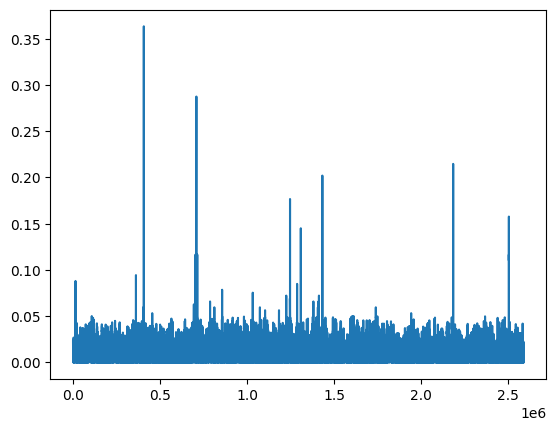

In [112]:
data['DC High %'].plot()

In [65]:
import pandas as pd 
import numpy as np
import time 
from configparser import ConfigParser
from utils.utils import Frequency, FrequencyProfile
from datetime import timedelta

class BiddingSim():
    def __init__(self, config: ConfigParser):
                
        self.__config_sim = config
        self.__start_date = pd.to_datetime(self.__config_sim['TIMEFRAME']['START_DATE'])-pd.Timedelta(hours=1)
        self.__end_date = pd.to_datetime(self.__config_sim['TIMEFRAME']['END_DATE'])
        self.__frequency_path = str(self.__config_sim['PROFILE']['FREQUENCY_PROFILE'])
    
    def run(self):
        #read frquency data
        frequency = FrequencyProfile(pd.read_csv(self.__frequency_path))
        frequency.add_response()
        frequency.aggregate_to_EAC_windows()

        intraday_price = [1,1,1,1,1,1]

        #cut to the timeframe under investigation but include the week before for usage prediction
        frequency = frequency.loc[(frequency.index >= self.__start_date - pd.Timedelta(weeks=1)) & (frequency.index <= self.__end_date)]
        
        frequency.add_EAC_window_identifier()

        #loop through the data and generate

        #check wether it starts with EAC window 1
        if frequency.loc[frequency.index >= self.__start_date].iloc[0]['EAC_window'] != 0:
            raise ValueError('Start date is not an EAC window 1.')
        #create an empty dataframe with the same indexes as the frequency data
        bids_df = pd.DataFrame(frequency.loc[frequency.index >= self.__start_date], columns=['Bid DR_high','Bid DR_low','Bid DM_high','Bid DM_low','Bid DC_high','Bid DC_low'])

        for index, row in frequency.loc[(frequency.index >= self.__start_date)].iterrows():
            bids = self.__generate_energy_cost(frequency,index,intraday_price) #+self.__generate_aging_cost(row)
            bids_df.loc[index] = bids

        return bids_df

    def __generate_energy_cost(self,frequency,index,intraday_price):
        bids = []
        EAC_window = int(frequency.loc[index]['EAC_window'])
        
        for column in frequency.columns[1:-1]:
            #generate expected energy usage by averaging over the last 7 days
            expected_usage = frequency.loc[(frequency['EAC_window'] == EAC_window) & (frequency.index >= index - pd.Timedelta(weeks=1))][column].mean()*4
            
            #generate the bid
            sign = 1 if 'low' in column else -1
            bid = expected_usage*intraday_price[EAC_window]*sign
            bids.append(bid)
        
        return bids
    
    def __generate_aging_cost(self,)
    
    #accepted_bids = self.__run_market(bids)
        


if __name__ == '__main__':
    config_sim = ConfigParser()
    config_sim.read('configs/optimization.optsim.ini')
    x = BiddingSim(config_sim)


In [11]:
import pandas as pd 
import numpy as np
import time 
from configparser import ConfigParser
from utils.utils import Frequency, FrequencyProfile
from datetime import timedelta

class BiddingSim():
    def __init__(self, config: ConfigParser):
                
        self.__config_sim = config
        self.__start_date = pd.to_datetime(self.__config_sim['TIMEFRAME']['START_DATE'])-pd.Timedelta(hours=1)
        self.__no_of_weeks = self.__config_sim['TIMEFRAME']['NO_OF_WEEKS']
        self.__auction_data = pd.read_csv(str(self.__config_sim['PROFILE']['AUCTION_DATA']))
        self.__intraday_prices = pd.read_csv(str(self.__config_sim['PROFILE']['INTRADAY_PRICES']))
        self.__frequency_path = str(self.__config_sim['PROFILE']['FREQUENCY_PROFILE'])
    
    def run(self):
        #initialize global variables and read frequency data
        frequency = FrequencyProfile(pd.read_csv(self.__frequency_path))
        frequency.add_response()
        frequency.aggregate_to_EAC_windows()

        global_revenue = [0]
        global_energy_cost = [0]
        remaining_capacity = [1]

        for i in range(0,self.__no_of_weeks):
            
            start_of_week = self.__start_date + pd.Timedelta(weeks=i)
            #generate bids for the week based on past frequency data and expectations
            bids = self.__generate_bids_weekly(frequency,start_of_week)

            #add an identifier which bids were accepted based on real market data from the UK
            accepted_bids = self.__run_market(bids,self.__auction_data)

            #operate the battery for the week
            revenue, mean_soc, energy_cost, no_cycles = self.__operate_battery(accepted_bids,self.__intraday_prices)

            #determine the actual incurred aging within that week
            capacity_fade = self.run_aging_model(mean_soc,no_cycles)

            #update global variables
            global_revenue.append(revenue)
            global_energy_cost.append(energy_cost)
            remaining_capacity.append(capacity_fade*remaining_capacity[-1])

        return global_revenue, global_energy_cost, remaining_capacity

    def __generate_bids_weekly(self,frequency: pd.DataFrame,start_of_week):
        
        bids_weekly = []

        for day in range(0,7):
            for EAC_window in range (0,6):
                #determine the cost (or revenue) associated with the expected energy usage for the 6 services
                energy_cost = np.array(self.__generate_energy_cost(frequency,start_of_week+pd.Timedelta(days=day),EAC_window))

                #determine the cost associated with the aging of the battery operating at the expected rate
                aging_cost = np.array(self.__generate_aging_cost(frequency,start_of_week+pd.Timedelta(days=day),EAC_window))

                #append the bid to the list through piecewise addition of the energy and aging cost
                bids_weekly.append(energy_cost + aging_cost)
                
        return bids_weekly
    
    def __generate_energy_cost(self,frequency,day,EAC_window):
       
        expected_energy_cost = []
        for column in frequency.columns[1:-1]:
            #extract the expected usage for said day by averaging over the same EAC window in the last week
            expected_usage = frequency.loc[(frequency.index <= day) & (frequency['EAC_window'] == EAC_window) & (frequency.index >= day - pd.Timedelta(weeks=1))][column].mean()*4
            
            #determine the expected price per energy unit in the timeframe under investigation
            expected_price = 13.5 #TODO: implement a function to determine the expected price

            #generate the bid
            sign = 1 if 'low' in column else -1
            bid = expected_usage*expected_price*sign
            
            expected_energy_cost.append(bid)
        
        return expected_energy_cost
    

    def __generate_aging_cost(self,frequency,day,EAC_window):
        
        expected_aging_cost = []

        for column in frequency.columns[1:-1]:
            #extract the expected usage for said day by averaging over the same EAC window in the last week
            expected_cycles = frequency.loc[(frequency.index <= day) & (frequency['EAC_window'] == EAC_window) & (frequency.index >= day - pd.Timedelta(weeks=1))][column].mean()*4
            
            #determine the expected price per energy unit in the timeframe under investigation
            aging_price =  expected_cycles * 13.9 #TODO: implement a better way of determining the aging price

            expected_aging_cost.append(aging_price)

        return expected_aging_cost  
    
    def __run_market(self,bids,auction_data):
        
        accepted_bids = []

        for day in range(0,7):
            for EAC_window in range (0,6):
                accepted_bids.append(1) #for now assume all bids are accepted
        
        return accepted_bids
    
    def __operate_battery(self,bids,accepted,auction_data,self.__intraday_prices):
        


if __name__ == '__main__':
    config_sim = ConfigParser()
    config_sim.read('configs/optimization.optsim.ini')
    x = BiddingSim(config_sim)

SyntaxError: expected ':' (3623756000.py, line 67)

In [46]:
config_sim = ConfigParser()
config_sim.read('configs/optimization.optsim.ini')
x = BiddingSim(config_sim)

In [66]:
bids = x.run()

The data was resampled with a fixed offset of 3h. This means the first window starts on 2024-03-31 23:00:00 and the last window starts on 2024-04-30 23:00:00


In [67]:
bids.head()

,Bid DR_high,Bid DR_low,Bid DM_high,Bid DM_low,Bid DC_high,Bid DC_low
dtm,,,,,,
2024-04-02 23:00:00,-0.165166,0.094252,-0.032116,0.022676,-0.598631,0.680205
2024-04-03 03:00:00,-0.134852,0.167142,-0.024822,0.030281,-0.461510,0.856679
2024-04-03 07:00:00,-0.107994,0.148192,-0.025610,0.026463,-0.477362,0.767616
2024-04-03 11:00:00,-0.104430,0.208147,-0.024394,0.034035,-0.454704,0.928710
2024-04-03 15:00:00,-0.102497,0.211013,-0.022937,0.037051,-0.386731,1.021429


In [3]:
from utils.utils import FrequencyProfile
import pandas as pd

profile_df = pd.read_csv('Data/Frequency/fnew-2024-4.csv')
profile = FrequencyProfile(profile_df)

In [4]:
profile.add_response()

In [5]:
profile.head()

,dtm,f,DM_high,DM_low,DC_high,DC_low,DR_high,DR_low
0,2024-04-01 00:00:00,50.099,0.049412,0.0,0.022703,0.0,0.423174,0.0
1,2024-04-01 00:00:01,50.089,0.043529,0.0,0.020000,0.0,0.372796,0.0
2,2024-04-01 00:00:02,50.074,0.034706,0.0,0.015946,0.0,0.297229,0.0
3,2024-04-01 00:00:03,50.062,0.027647,0.0,0.012703,0.0,0.236776,0.0
4,2024-04-01 00:00:04,50.054,0.022941,0.0,0.010541,0.0,0.196474,0.0


In [6]:
profile.aggregate_to_EAC_windows()

The data was resampled with a fixed offset of 3h. This means the first window starts on 2024-03-31 23:00:00 and the last window starts on 2024-04-30 23:00:00


In [9]:
profile.add_EAC_window_identifier()

In [10]:
profile.head()

,f,DM_high,DM_low,DC_high,DC_low,DR_high,DR_low,EAC_window
dtm,,,,,,,,
2024-03-31 23:00:00,49.989301,0.012889,0.045202,0.005556,0.008121,0.103567,0.227324,0
2024-04-01 03:00:00,50.015113,0.047180,0.014891,0.007982,0.004585,0.147762,0.142302,1
2024-04-01 07:00:00,49.971430,0.010413,0.066767,0.003541,0.010338,0.066002,0.279793,2
2024-04-01 11:00:00,50.002526,0.021407,0.026584,0.006244,0.006044,0.116392,0.174946,3
2024-04-01 15:00:00,49.960562,0.020163,0.089532,0.004214,0.013284,0.078548,0.349440,4


In [50]:
profile_df = pd.read_csv('Data/Frequency/fnew-2024-4.csv')
profile = FrequencyProfile(profile_df)
profile.add_response()

In [51]:
profile = FrequencyProfile(profile_df)
profile.add_response()

In [52]:
profile.aggregate_to_EAC_windows()

The data was resampled with a fixed offset of 3h. This means the first window starts on 2024-03-31 23:00:00 and the last window starts on 2024-04-30 23:00:00


In [53]:
profile.head()

,f,DM_high,DM_low,DC_high,DC_low,DR_high,DR_low
dtm,,,,,,,
2024-03-31 23:00:00,49.989301,0.012889,0.045202,0.005556,0.008121,0.103567,0.227324
2024-04-01 03:00:00,50.015113,0.047180,0.014891,0.007982,0.004585,0.147762,0.142302
2024-04-01 07:00:00,49.971430,0.010413,0.066767,0.003541,0.010338,0.066002,0.279793
2024-04-01 11:00:00,50.002526,0.021407,0.026584,0.006244,0.006044,0.116392,0.174946
2024-04-01 15:00:00,49.960562,0.020163,0.089532,0.004214,0.013284,0.078548,0.349440


In [59]:
filtered['EAC_window'] = (filtered.index.hour % 23 + 1) // 4

/var/folders/dq/5f21rw_12wb2gcspzdyc45fw0000gn/T/ipykernel_22652/1829034576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['EAC_window'] = (filtered.index.hour % 23 + 1) // 4


In [63]:
filtered.loc[filtered['EAC_window'] == 0].head(20)

,f,DM_high,DM_low,DC_high,DC_low,DR_high,DR_low,EAC_window
dtm,,,,,,,,
2024-03-31 23:00:00,49.989301,0.012889,0.045202,0.005556,0.008121,0.103567,0.227324,0
2024-04-01 23:00:00,50.038026,0.070654,0.011997,0.012415,0.003398,0.231413,0.112748,0
2024-04-02 23:00:00,49.984199,0.028013,0.028824,0.004668,0.007950,0.087006,0.236400,0
2024-04-03 23:00:00,49.994031,0.039525,0.040478,0.007175,0.008471,0.133734,0.237083,0
2024-04-04 23:00:00,50.031030,0.082924,0.019743,0.011785,0.004645,0.219667,0.135278,0
2024-04-05 23:00:00,50.016673,0.023324,0.008638,0.006829,0.003095,0.127290,0.112726,0
2024-04-06 23:00:00,50.017587,0.031711,0.010059,0.007775,0.004004,0.144926,0.128801,0


In [64]:
filtered['DR_low'].mean()*4

0.8110059870954127

In [13]:
a = []
a.append(1)
a.append(3)

b = []
b.append(2)
b.append(4)

#print piecewise addition of a and b
[a+b for a,b in zip(a,b)]

[3, 7]

In [41]:
import numpy as np
def generate_bids_weekly(frequency: pd.DataFrame,start_of_week):
    
    bids_weekly = []

    for day in range(0,7):
        print('Running day: ',day)
        for EAC_window in range (0,6):
            print('Running EAC window: ',EAC_window)
            #determine the cost (or revenue) associated with the expected energy usage for the 6 services
            energy_cost = np.array(generate_energy_cost(frequency,start_of_week+pd.Timedelta(days=day),EAC_window))

            #determine the cost associated with the aging of the battery operating at the expected rate
            aging_cost = np.array(generate_aging_cost(frequency,start_of_week+pd.Timedelta(days=day),EAC_window))

            #append the bid to the list through piecewise addition of the energy and aging cost
            print('Energy cost: ',energy_cost)
            print('Aging cost: ',aging_cost)
            print('Bid: ',energy_cost + aging_cost)
            bids_weekly.append(energy_cost + aging_cost)
            
    return bids_weekly

def generate_energy_cost(frequency,day,EAC_window):
    
    expected_energy_cost = []
    for column in frequency.columns[1:-1]:
        #extract the expected usage for said day by averaging over the same EAC window in the last week
        expected_usage = frequency.loc[(frequency.index <= day) & (frequency['EAC_window'] == EAC_window) & (frequency.index >= day - pd.Timedelta(weeks=1))][column].mean()*4
        
        #determine the expected price per energy unit in the timeframe under investigation
        expected_price = 13.5 #TODO: implement a function to determine the expected price

        #generate the bid
        sign = 1 if 'low' in column else -1
        bid = expected_usage*expected_price*sign
        
        expected_energy_cost.append(bid)
    
    return expected_energy_cost
    

def generate_aging_cost(frequency,day,EAC_window):
    
    expected_aging_cost = []

    for column in frequency.columns[1:-1]:
        #extract the expected usage for said day by averaging over the same EAC window in the last week
        expected_cycles = frequency.loc[(frequency.index <= day) & (frequency['EAC_window'] == EAC_window) & (frequency.index >= day - pd.Timedelta(weeks=1))][column].mean()*4
        
        #determine the expected price per energy unit in the timeframe under investigation
        aging_price =  expected_cycles * 13.9 #TODO: implement a better way of determining the aging price

        expected_aging_cost.append(aging_price)

    return expected_aging_cost  

In [31]:
start_of_week = pd.to_datetime('2024-04-03 23:00:00')

In [42]:
bids = generate_bids_weekly(profile,start_of_week)

Running day:  0
Running EAC window:  0
Energy cost:  [-2.03959653  1.70777537 -0.40248454  0.3771902  -7.50223079 10.98298489]
Aging cost:  [ 2.10002902  1.75837612  0.41441001  0.38836621  7.72451911 11.30840666]
Bid:  [6.04324899e-02 3.46615149e+00 1.19254680e-02 7.65556411e-01
 2.22288320e-01 2.22913915e+01]
Running EAC window:  1
Energy cost:  [-2.70670787  1.20364092 -0.44596431  0.29101622 -8.29419395  8.59186398]
Aging cost:  [2.78690662 1.23930435 0.45917807 0.29963892 8.53994785 8.84643773]
Bid:  [8.01987516e-02 2.44294527e+00 1.32137574e-02 5.90655135e-01
 2.45753895e-01 1.74383017e+01]
Running EAC window:  2
Energy cost:  [-1.43966996  1.6997129  -0.3528348   0.32786834 -6.57676952  9.54725126]
Aging cost:  [1.48232685 1.75007477 0.36328916 0.33758296 6.77163677 9.83013278]
Bid:  [4.26568878e-02 3.44978767e+00 1.04543644e-02 6.65451307e-01
 1.94867245e-01 1.93773840e+01]
Running EAC window:  3
Energy cost:  [-1.4865814   3.31344265 -0.34400169  0.47366453 -6.41212217 12.7064